# WEEK 5: Notes

In this week's module, we'll start with the implementation of classification algorithms in SK-Learn

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk

# SK-Learn APIs for Classification

- There are broadly two types of API for **classification**:
    - Generic
        - Uses <span style="text-decoration: underline">Gradient Descent</span> for optimization
        - Need to specify the <span style="color:red">loss function</span>
        - ```SGD Classifier```
    - Specific
        - <span style="text-decoration: underline">Specialized Solvers</span> for optimization
        - ```Logistic Regression```
        - ```Perceptron```
        - ```Ridge Classifier``` (For Least Squared Classifier)
        - ```KNNs```
        - ```SVMs```
        - ```Naive Bayes```
        
> All Sklearn estimators for classification implement a few common methods for <span style="color:green">model training, prediction and evaluation</span>
>> Model training <br>- ```fit(X, y[,...])``` <br><br>
>>Prediction <br>- ```predict(X)```: Predicts the class label <br>- ```decision_function(X)```: predicts the confidence score for samples<br><br>
>> Evaluation <br>-```score(X, y[,sample_weigt])```: Returns the mean accuracy

***
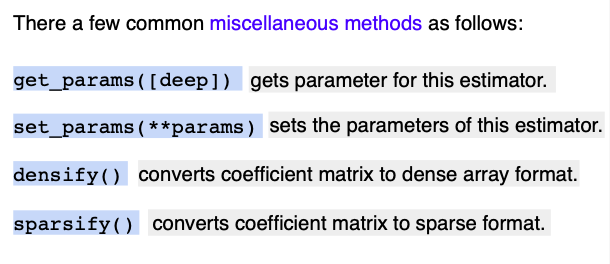
***

# Implementing Least Square Classifier(LSC) with ```RidgeClassifier``` API

- ```RidgeClassifier``` is a classifier varient of Ridge regressor

## Binary Classification
- Classifier first converts binary target to $\{-1,1\}$ and then treats the problem as a regression task, optimizing the objective of regressor:

$$
\underset{w}{\min} \Vert Xw-y\Vert^2_2 + \alpha \Vert w \Vert_2^2
$$
- There are multiple solvers provided by SK-Learn for the above optimization
    - SK-Learn uses $\alpha$ to denote regularization rate

## Multi-class Classification
- Treated as <span style="color:green">Multi-Output Regression</span>
- Predicted class corresponds to the output with the highest value

## Training a LSC

- **STEP 1:** Instantiate a classification estimator without passing any arguments to it. This creates a ridge classifier object.

```python
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier()
```

- **STEP 2:** Call the ```fit``` method to train using the training data

```python
ridge_clf.fit(X_train, y_train)
```
***

In [3]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=42)

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import RidgeClassifier

ridge_clf = RidgeClassifier()

ridge_clf.fit(X_train, y_train)

RidgeClassifier()

In [6]:
ridge_clf.score(X_test, y_test)

0.9649122807017544

## Setting the Regularization Rate

- Set ```alpha``` to a float value
    - Value must be positive
    - Larger alpha value means **stronger regularization**
    - Default value: 0.1

In [7]:
ridge_clf = RidgeClassifier(alpha=0.001)
ridge_clf.fit(X_train, y_train)
ridge_clf.score(X_test, y_test)

0.9532163742690059

In [8]:
ridge_clf = RidgeClassifier(alpha=0.3)
ridge_clf.fit(X_train, y_train)
ridge_clf.score(X_test, y_test)

0.9707602339181286

## Solving Optimization problem in ```RidgeClassifier```

- Use one of the below <span style="color:green">solvers</span>

solver | Description
--- | ---
```svd``` | Uses Singular Value Decomposition of the feature matrix to compute the ridge coeffs
```cholesky``` | Uses [**```scipy.linalg.solve```**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html) function to obtain the closed-form solution
```sparge_cg``` | Uses the conjugate gradient solver of [**```scipy.sparse.linalg.cg```**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)
```lsqr``` | Uses the dedicated regularized least-squares routine [**```scipy.sparse.linalg.lsqr```**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.lsqr.html) and <span style="color:green"> IT IS THE FASTEST</span>
```sag```, ```saga``` | Uses a stochastic avg GD iterative procedure <br> 'saga' is **unbiased** and more flexible version of 'sag'
```lbfgs``` | Uses **L-BFGS-B** algorithm implemented in [**```scipy.optimize.minimize```**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) <br> Can be used only when coeffs are forced to be positive


> Limited BFGS(LBFGS) is an iterative method for solving unconstrained nonlinear optimization problems

## Uses of solver in RidgeClassifier

- For large scale data, use **```sparce_cg```** solver
- When both, **```n_samples```** and **```n_features```** are large, use ```sag``` or ```saga``` solvers
    - Note that, fast convergence is only guaranteed on features with approximately the same scale

## Default solver for ```RidgeClassifier```

- Default is set to **```'auto'```** 
    - Automatically picks the solver based on the data
    
***
Uses a logic similar to this:

```python
if solver == 'auto':
    if return_intercept:
        solver = 'sag' # only sag supports fitting intercept directly
    elif not sparse.issparse(X):
        solver = 'cholesky'
    else:
        solver = 'sparce_cg'
```

***

- By default, we have ```fit_intercept = True```
    - Set it to False if the data is already centered

## RidgeClassifierCV

- Built in CV for Ridge classifier

In [19]:
from sklearn.linear_model import RidgeClassifierCV

ridge_clf_cv = RidgeClassifierCV(cv=5,
                                 alphas=[0.1, 0.01, 0.001, 0.2, 0.25, 0.225, 0.3]
                                )

In [20]:
ridge_clf_cv.fit(X_train, y_train)

RidgeClassifierCV(alphas=[0.1, 0.01, 0.001, 0.2, 0.25, 0.225, 0.3], cv=5)

In [21]:
ridge_clf_cv.alpha_

0.2

In [22]:
ridge_clf_cv.score(X_test, y_test)

0.9707602339181286

# Perceptron Classifier

- Shares the same underline implementation with ```SGDClassifier```
```python
SGDClassifier(loss='perceptron', 
              eta0=1, 
              learning_rate="constant", penalty=None)
```
    
- Perceptron uses SGD for training

- Suitable for <span style="color:Purple">large-scale learning.</span>

## Implementation of a perceptron classifier

In [9]:
from sklearn.linear_model import Perceptron

percep = Perceptron()

In [10]:
percep.fit(X_train, y_train)

Perceptron()

In [11]:
percep.score(X_test, y_test)

0.935672514619883

## Parameters for Perceptron

Parameter | Default value
--- | ---
```penalty``` | 'l2'
```alpha``` | 1e-4
```fit_intercept``` | True
```n_iter_no_change``` | 5
```eta0``` | 1
```l1_ratio``` | 0.15
```early_stopping``` | False
```max_iter``` | 1000
```tol``` | 1e-3
```validation_fraction``` | 0.1

***
- Perceptron classifier can be trained in an iterative manner with ```partial_fit```method
- Perceptron classifier can be initialized to the weights of the previous run by specifying ```warm_start = True``` in the constructor.

# Logistic Regression


- AKA with the following names:
    - logit regression
    - maximum entropy classifier (maxent)
    - log-linear classifier
$$
\underset{w, C}{\arg \min} \text{ (Regularization penalty)} + C\cdot \text{(cross-entropy loss)}
$$

- Trying to find $w$ and $C$ which would minimize the reg. penalty + C times the cross-entropy loss

- C here is the inverse of lambda that we studied in MLT


- This implementation can fit
    - Binary classification
    - One-v/s-Rest (OvR)
    - Multinomial logistic regression

- Provision for $\ell_1, \ell_2$ or elastic-net regularization

## Implementation of Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

In [47]:
%%time
logit.fit(X_train_norm, y_train)
logit.score(X_test_norm, y_test)

CPU times: user 6.76 ms, sys: 1.34 ms, total: 8.1 ms
Wall time: 8.49 ms


0.9824561403508771

***
- Logistic Regression uses <span style="color:Purple">specific algorithms</span> for solving the optimization problem. These algorithms are known as **<span style="color:green">solvers</span>**

- The choice of the solver depends on the <span style="color:Purple">classification problem set up</span> such as the <span style="color:red">size of the dataset, number of features, labels</span> etc

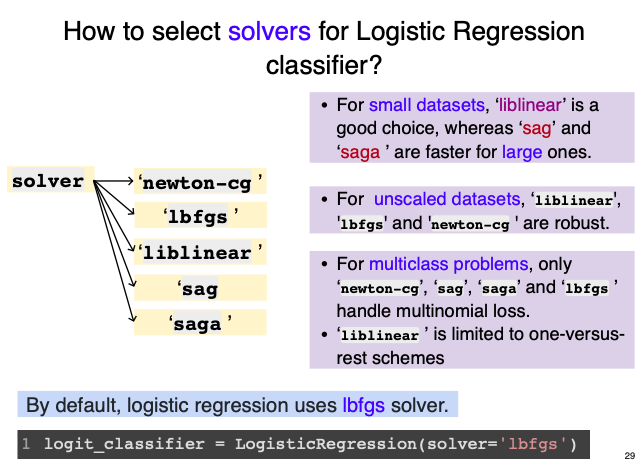

In [37]:
logit = LogisticRegression(solver='liblinear',)

In [50]:
%%time
logit.fit(X_train_norm, y_train)
logit.score(X_test_norm, y_test)

CPU times: user 5.85 ms, sys: 479 µs, total: 6.33 ms
Wall time: 6.24 ms


0.9824561403508771

## Adding Penalty
- Default is l2 norm
- can use ```None```, ```l1```, ```l2``` or ```elasticnet```

- Not all solvers support all the penalties
- Selecting an appropriate solver is important, according to the penalty

Solver | Penalties supported
--- | ---
newton-cg | [l2, None]
lbfgs | [l2, None]
liblinear | [l1, l2]
sag | [l2, None]
saga | [l1, l2, elasticnet, None]

- l2 norm penalty is supported by all solvers
- l1 is supported by only a few

## Controling the Amount of Regularization

- Hyperparameter: $C$, inverse of regularization rate

- C must be positive
    - <span style="color:Purple">Smaller value</span> leads to <span style="color:green">stronger regularization</span>
    - <span style="color:Purple">Larger value</span> leads to <span style="color:green">weaker regularization </span>
    
***
- Another hyperparameter is <span style="color:blue">class_weight</span>
    - Handles class imbalances with differential class weights
    - Mistakes in a class are <span style="color:red">penalized by the class weight.</span>
    - Higher value here would mean higher emphasis(importance/attention) on the class
    
[**STACKOVERFLOW ARTICLE on how this param works**](https://stackoverflow.com/questions/30972029/how-does-the-class-weight-parameter-in-scikit-learn-work)

- If class 0 is 12 times more frequent than class 1, something like this would be helpful:
```python
class_weight={0: 1, 1: 12}
```

This would give class 1 12 times more importance

***
- ```LogisticRegressionCV``` has built in CV to find the best value for $C$ and $l1\_ratio$

# SGDClassifier

- API uses SGD as an optimization technique
- Supports <span style="color:purple">multi-class classification</span> by combining multiple binary classifiers in a ***"one versus all(OvA)"*** scheme
- Easily scales up to large scale problems with more than $10^5$ training examples and $10^5$ features.
    - Also works with sparse ML problems
        - Text classification, NLP, etc

- Need to set the ```loss``` parameter:

Loss | Description
--- | ---
```hinge``` | soft-margin linear SVM
```log``` | logistic regression
```modified_huber``` | smoothed hinge loss<br> brings tolerance to ```outliers as well as probability estimates
```squared_hinge``` | like hinge but is quadratically penalized
```perceptron``` | linear loss used by perceptron algorithm
```squared_error``` <br> ```huber``` <br> ```epsilon_insensitive``` <br> ```squared_epsilon_insensitive``` | regression losses

<br>

> By default, the loss is ```hinge``` and SGD trains a linear SVM classifier

- An instance of SGDClassifier might have an equivalent estimator in SK-Learn API
Example:

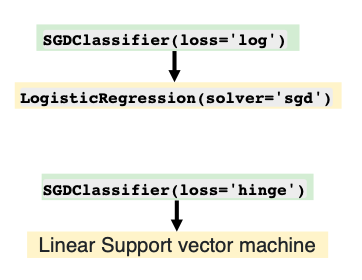

## Working of SGDClassifier

- Implements a plain SGD learning routine
    - Gradient of the loss is estimated with one sample at a time and the model is updated along the way with a decreasing learning rate schedule

**ADVANTAGES**
- Efficient
- Ease of implementation

**DISADVANTAGES**
- Required a number of HPs
- Sensitive to feature scaling
***
**Important notes:**
- Permute the training data before fitting the model
- standardize the features
***

In [53]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log_loss') # logistic regression

sgd.fit(X_train_norm, y_train)
sgd.score(X_test_norm, y_test)

0.9649122807017544

## Regularization in SGDClassifier

- ```penalty``` parameter can be set to:
    - None
    - "l1"
    - "l2"
    - "elasticnet": convex combination of l2 and l1

Following is the cost function for ElasticNet
- $J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^{n}|\theta_i| + \dfrac{1-r}{2}\alpha \sum_{i=1}^n \theta_i^2$
        
- Here, r is the mix ratio

> Default is l2 penalty

- ```alpha``` is the constant that multiplies the regularization term
    - Higher value means stronger regularization
    - Default = 0.0001
    
***
## Maximum number of epochs
- Can set ```max_iter```
    - Default = 1000
 
***

## Other common parameters

- ```learning_rate```
    - 'constant'
    - 'optimal'
    - 'invscaling'
    - 'adaptive'

<br>

- ```average```: Average SGD
    - True
    - False

<br>

- ```warm_start```
    - True
    - False

<br>

**Stopping criteria**
- ```tol```
- ```n_iter_no_change```
- ```max_iter```
- ```early_stopping```
- ```validation_fration```

# MULTILEARNING CLASSIFICATION

- Extending our learning to <span style="color:purple">multi-class, multi-label & multi-output</span> settings


## Basics of multi-class, multi-label & multi-output classification

- **MULTI-CLASS CLASSIFICATION** has exactly
    - 1 output label (target column)
    - total number of labels > 2 (classes)

- For more than one output labels(multiple target columns), we have two types of classification models:
    1. **MULTI-LABEL**
        - Total #labels $=$ 2
    2. **MULTI-CLASS MULTI-OUTPUT** or **MULTI-OUTPUT**
        - Total #labels $\gt$ 2
- Both will be referred to as <span style="color:purple">multi-label classification models</span>, where #output labels $\ge$ 2
***
- These set of problems are referred to as <span style="color:purple">multi-learning problem</span>

- SK-Learn provides a bunch of **meta-estimators**, which extend the functionality of base estimators to support multi-learning problems

- Meta estimators <span style="color:blue">transform</span> the multi-learning problem into a set of <span style="color:purple">simpler problems</span> and fit one estimator per problem

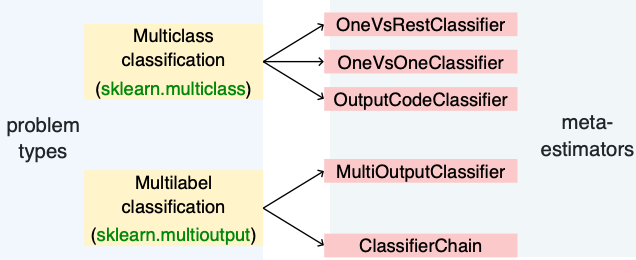

- Many estimators have <span style="color:purple">built-in support </span> formulti-learning problems
    - Meta-estimators are not needed for such estimators
    - They can be used in case we want to use the base estimator with strategies beyong the built-in ones
    
    

- SK-Learn estimators can be:
    1. Inherently multiclass
    1. Multiclass as OvO
    1. Multiclass as OvR
    1. Multilabel

## Inherently Multi-Class

```python
> LogisticRegression(multi_class='multinomial')
> LogisticRegressionCV(multi_class='multinomial')
> RidgeClassifier()
> RidgeClassifierCV()
```

## Multiclass as OvR

```python
> LogisticRegression(multi_class='ovr')
> LogisticRegressionCV(multi_class='ovr')
> SGDClassifier()
> Perceptron()
```

## Multi-Label

```python
> RidgeClassifier()
> RidgeClassifierCV()
```

# Multi-Class Classification

- Classification tasks with more than 2 classes
    - Example, digits classification
    
- Each example has exactly 1 label

- Examples:
    1. Iris Dataset
        - Labels: [Setosa, versicolor, virginica]
    1. MNIST Digit Dataset
        - Labels: [0,1,2,3,4,5,6,7,8,9]

## Representing Class Labels in Multi-Class Setup

- Each example is marked with a single label out of the k labels
- Shape of label vector is $(n,1)$

- Use ```LabelBinarizer``` transformation to convert the class label to multi-class format

- Resulting label vector will have the shape $(n,k)$

In [54]:
from sklearn.preprocessing import LabelBinarizer

y = np.array([
    'apple',
    'pear',
    'apple',
    'orange'
])

y_dense = LabelBinarizer().fit_transform(y)

print(y_dense)

[[1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]]


## Checking the Type of the Labels

In [58]:
from sklearn.utils.multiclass import type_of_target

print(type_of_target(y))
print(type_of_target(y_train)) # from breast cancer dataset
print(type_of_target(y_dense))

multiclass
binary
multilabel-indicator


Target Type | Description of $y$
--- | ---
multiclass | - contains more than 2 discrete values <br>- Not a sequence of sequences <br>- 1D or a column vector
multiclass-multioutput | - 2D array that contains more than 2 discrete values <br>- Not a sequence of sequences<br>- dimension are of size $>1$
multilabel-indicator | - Label indicator matrix<br>- An array of 2 dimensions with **at least** 2 columns and **at more** 2 unique values
unknown | - Array-like but none of the above, such as 3D array<br>- Sequence of sequences, or an array of non-sequence object

- Examples:

In [61]:
print(type_of_target([1,0,2]))

print(type_of_target([1,0, 2,0, 3,0]))

print(type_of_target(['a', 'b', 'c']))

print(type_of_target([
    [1,2],
    [3,4]
]))

print(type_of_target([
    [1,5] # Need not be 1,0 for multilabel-indicator
]))

multiclass
multiclass
multiclass
multiclass-multioutput
multilabel-indicator


- Apart from these, can also determine target type for regression tasks
    - ```Continuous```: regression target
    - ```continuous-multioutput```: multi-output target
    - ```binary```: classification
    
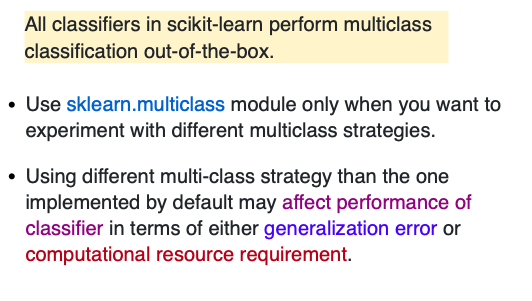

## Strategies in Multi-Class Classification

- Two main strategies:
    - One-vs-All or One-vs-Rest (OvR)
    - One-vs-One (OvO)
<br><br>

- OvR is implemented by the ```OneVsRestClassifier``` API
- OvO is implemented by the ```OneVsOneClassifier``` API

## One-vs-Rest (OvR, OvA)

- Fits one classifier per class: $C$ v/s not-$C$
- Computationally efficient approach
    - Requires only $K$ classifiers
- Resulting model is interpretable


In [62]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42
                                                   )

In [65]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

svm_clf = SVC(random_state=0)
ovr = OneVsRestClassifier(svm_clf)

ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(random_state=0))

In [66]:
ovr.score(X_test, y_test)

0.987037037037037

- Need to pass the estimator as an argument
- Supports methods like: fit, predict, predict_proba, partial_fit

- OvR also supports <span style="color:purple">multi-label classification</span>
    - We needto supply labels as indicator matrix of shape $(n,k)$

## One-vs-One (OvO)

- FIts one classifier per pair of classes from the $K$ classes present

- Total classifiers: $K\choose{2}$

- Predicts class that receives maximum votes
    - The tie among classes in broken by selecting the class with the highest aggregate classification confidence

- OvO classifier processes subset of data at a time and is useful in cases where the classifier does not scale with the data


In [67]:
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(svm_clf)

ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

0.987037037037037

## Difference between OvO and OvR

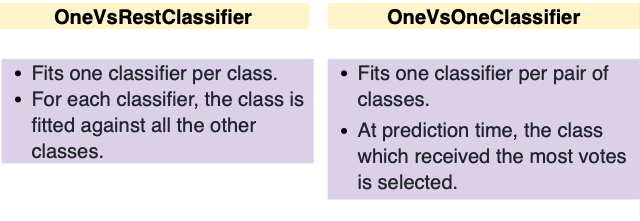

# Multi-Label and Multi-Output Classification

- There are 2 strategies, implemented by different APIs

- Below are the APIs and the strategy they implement

## Working of ```MultiOutputClassifier```

- Strategy consists of fitting <span style="color:purple">one classifier per target</span>


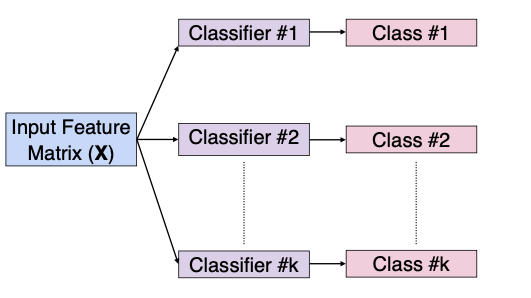

- Allows multiple target variable classification


## Working of ```ClassifierChain```

- A multi-label model that arranges binary classifier into a chain

- Way of combining a number of binary classifiers into a single multi-label model

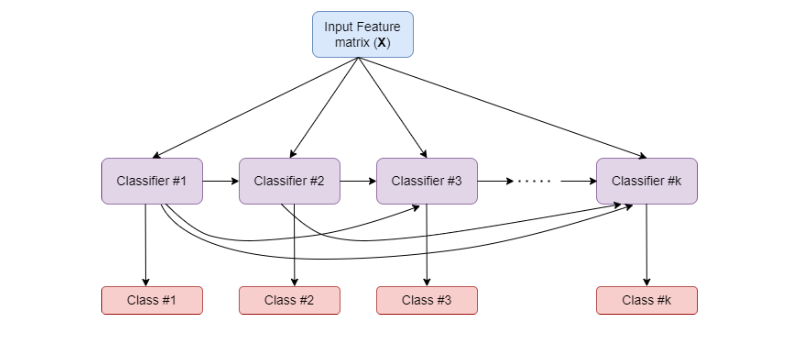

- First, the $X$ is fed to classifier #1 which outputs something. 
- Next, the output of classifier #1 as well as the matrix $X$ are fed to classifier #2, which then gives its output. This way, classifier #2 learns from the output of the first classifier as well as the feature matrix $X$
- This chain continues till the last

## Comparison of ```MultiOutputClassifier``` and ```ClassifierChain```

```MultiOutputClassifier``` | ```ClassifierChain```
--- | ---
Able to estimate a series of target functions that are trained on a single predictor matrix to predict a series of responses | Capable of exploiting correlations among targets
Allows multiple target variable classifications | For a multi-label classification problem with $k$ classes, $k$ binary classifiers are assigned an interger between $0$ and $k-1$<br>These intergers define the order of models in the chain

# Evaluating Classifiers

- Let's look at how to evaluate your classifier model once you have trained it



## Stratified CV Iterator

- One common issue is <span style="color:red">class imbalance</span> in classification, which tends to impact the CV folds

- The <span style="color:purple">overall class distribution</span> and the ones in <span style="color:purple">folds</span> may be different.
    - This can hinder the effective model training.
    
- So, to our rescue, SK-Learn provides us with 3 <span style="color:green">Stratified APIs</span> to create folds such that the overall class distribution is replicated in each individual folds
    1. ```StratifiedKFold```
    1. ```RepeatedStratifiedKFold```
    1. ```StratifiedShuffleSplit```


In [71]:
from sklearn.model_selection import (StratifiedKFold, 
                                     StratifiedShuffleSplit,
                                     RepeatedStratifiedKFold
                                    )

***
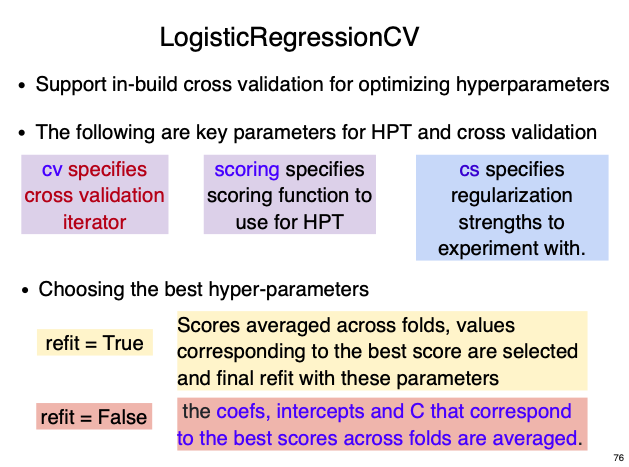

## Classification Metrics

- ```sklearn.metrics``` implements a bunch of classification scoring metrics based on **true labels** and **predicted labels** as input
    - ```accuracy_score```
    - ```balanced_accuracy_score```
    - ```top_k_accuracy_score```
    - ```roc_auc_score```
    - ```precision_score```
    - ```recall_score```
    - ```f1_score```
    
Common syntax:
```python
score(actual_labels, predicted_labels)
```

# Confusion Matrix

- ```confusion_matrix``` evaluated classification accuracy by computing the confusion matrix with each row corresponding to the true class


In [79]:
from sklearn.metrics import confusion_matrix

y_pred = ovo.predict(X_test)


In [80]:
confusion_matrix(y_test, y_pred)

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 65,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 42,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  1, 56]])

- Entry $(i,j)$ in the matrix represents the following:
    - Number of observations actually in group i, but predicted to be in group j
    
***
## ConfusionMatrixDisplay

- Confusion matrix can be displayed with ```ConfusionMatrixDisplay```

- Confusion matrix
```
ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
```
- From estimators
```
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
```
    
- From predictions
```
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
```

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                       display_labels=ovo.classes_)

# fig.plot() 

# not working as of now

# Classification Report

- Can generate a report with precision, recall, f1 scores as well as support


In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      0.98      0.98        54
           4       1.00      1.00      1.00        60
           5       1.00      0.98      0.99        66
           6       0.98      1.00      0.99        53
           7       0.98      0.98      0.98        55
           8       0.95      0.98      0.97        43
           9       0.97      0.95      0.96        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



# Classifier Performance across Probability Thresholds


## Precision Recall Curve

In [98]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#--------------
# Because it does not work with multilabel output
#--------------
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=42)

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

y_pred = logit.predict(X_test_norm)

#--------------
# Prediction complete
#--------------


precision, recall, threshold = precision_recall_curve(y_test, y_pred)

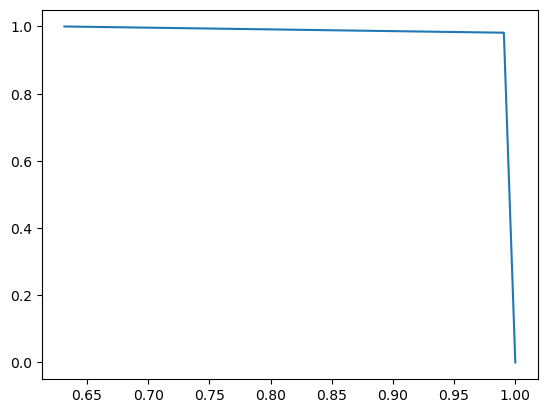

In [100]:
plt.plot(precision, recall)

## ROC Curve

- Receiver Operating Characteristic Curve

- min: 0.5
- max: 1
- closer to 1, better


In [101]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

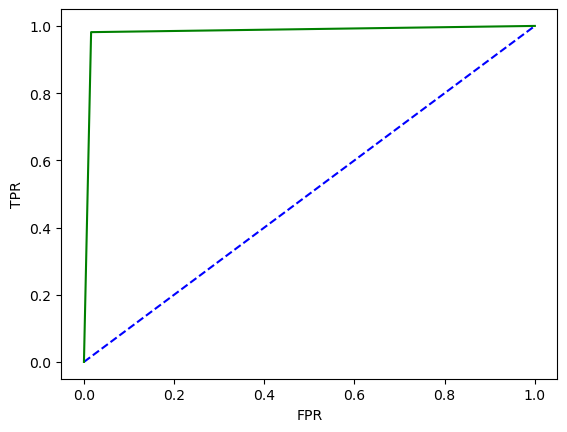

In [116]:
fig1 = plt.plot([0,1], [0,1], 'b--')
fig2 = plt.plot(fpr, tpr, "g-")
plt.xlabel("FPR")
plt.ylabel("TPR")

plt.show()

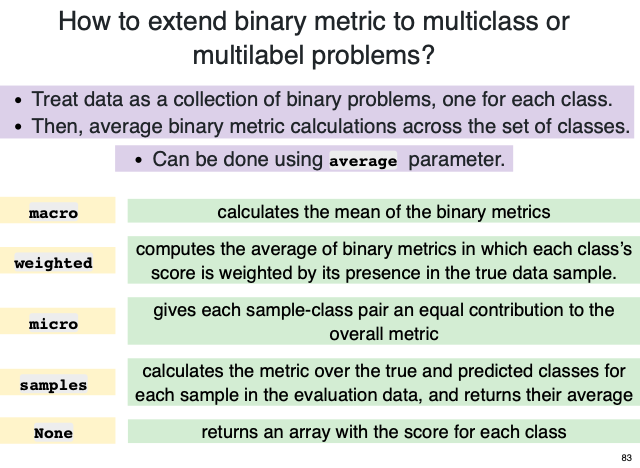